# Moving Average Analysis for the 4 tech companies

Here we will showcase our calculated 50-day Moving Average with the 50-day closing. 

>Note: See Stock Price Analysis file for a better explanation of code structure

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob

# Importing the dataset

In [21]:
# Import CSV files
glob.glob(r'G:\Dev Portfolio\Data Analysis\Time Series Analysis on S&P 500 Stock Market Data\individual_stocks_5yr')

['G:\\Dev Portfolio\\Data Analysis\\Time Series Analysis on S&P 500 Stock Market Data\\individual_stocks_5yr']

In [22]:
company_list = [    
    r'individual_stocks_5yr\\AAPL_data.csv' , 
    r'individual_stocks_5yr\\AMZN_data.csv' , 
    r'individual_stocks_5yr\\GOOGL_data.csv' , 
    r'individual_stocks_5yr\\MSFT_data.csv']
all_data = pd.DataFrame()

for company in company_list:
    current_df = pd.read_csv(company)
    all_data = pd.concat([all_data, current_df])

all_data.shape


(5036, 7)

In [23]:
all_data['Name'].unique()

array(['AAPL', 'AMZN', 'GOOGL', 'MSFT'], dtype=object)

In [24]:
all_data['date'] = pd.to_datetime(all_data['date'])
all_data['date']

0      2013-02-08
1      2013-02-11
2      2013-02-12
3      2013-02-13
4      2013-02-14
          ...    
1254   2018-02-01
1255   2018-02-02
1256   2018-02-05
1257   2018-02-06
1258   2018-02-07
Name: date, Length: 5036, dtype: datetime64[ns]

In [25]:
tech_list = all_data['Name'].unique()
tech_list

array(['AAPL', 'AMZN', 'GOOGL', 'MSFT'], dtype=object)

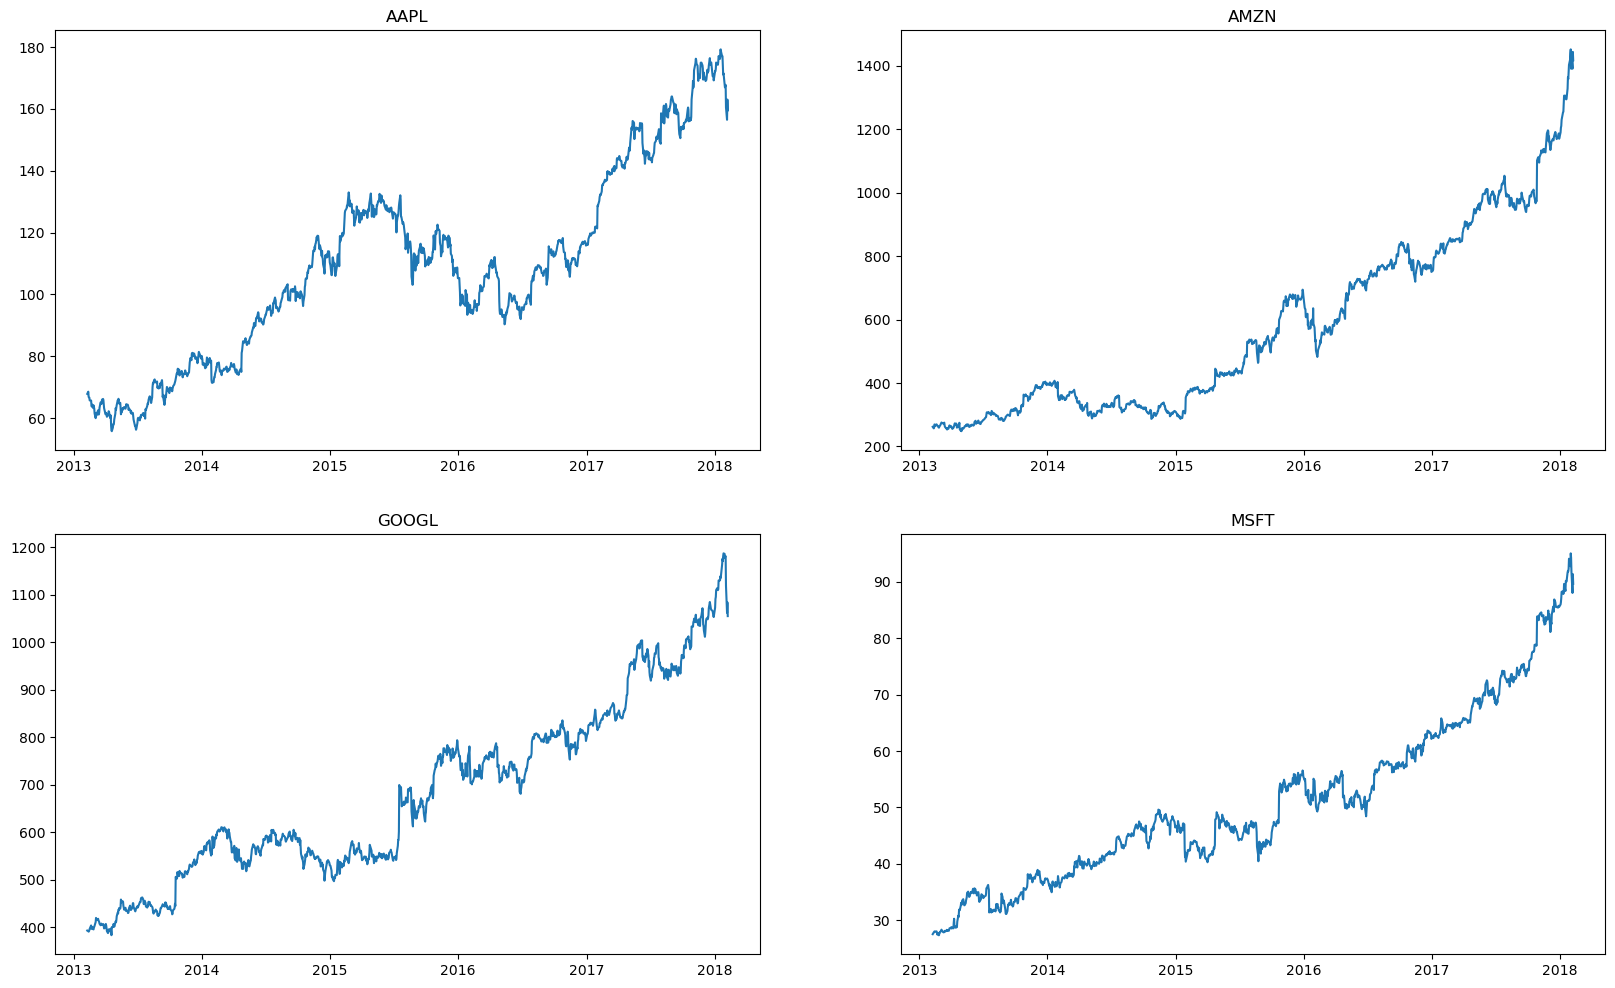

In [26]:
plt.figure(figsize=(20,12))

for index , company in enumerate(tech_list , 1):
    # creating subplot for each stock
    plt.subplot(2 , 2 , index)
    filter1 = all_data['Name']==company
    df = all_data[filter1]
     # plotting "date" vs "close"
    plt.plot(df['date'] , df['close'])
    plt.title(company)

<Figure size 2000x1200 with 0 Axes>

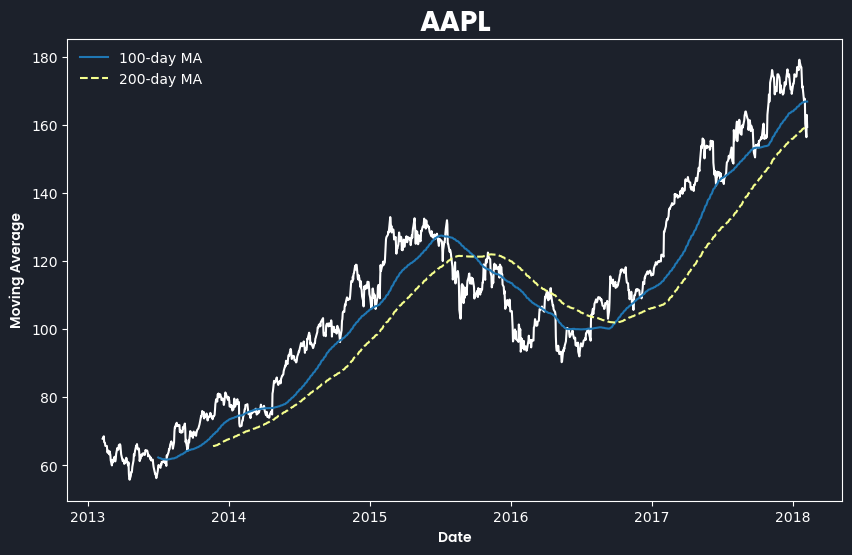

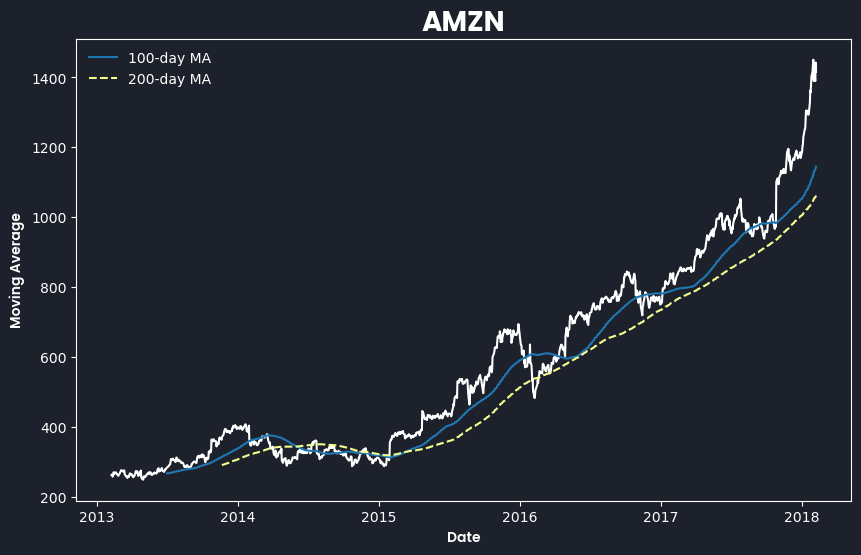

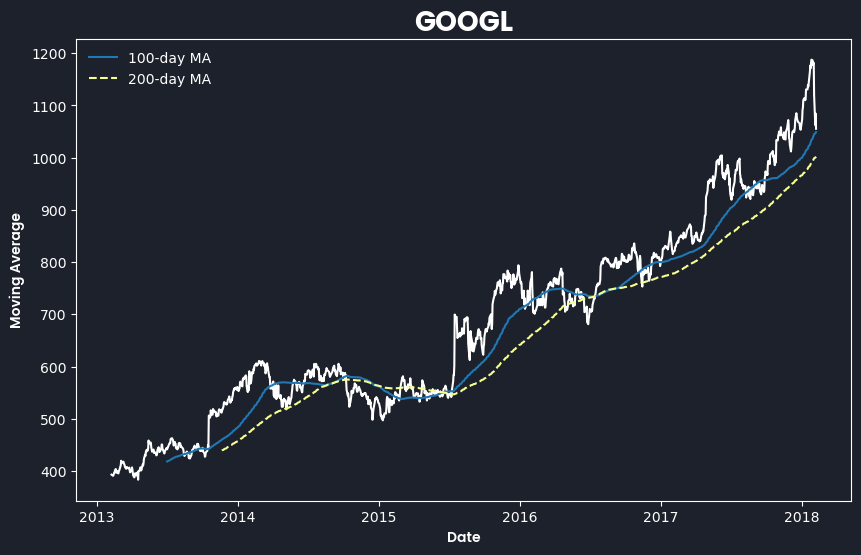

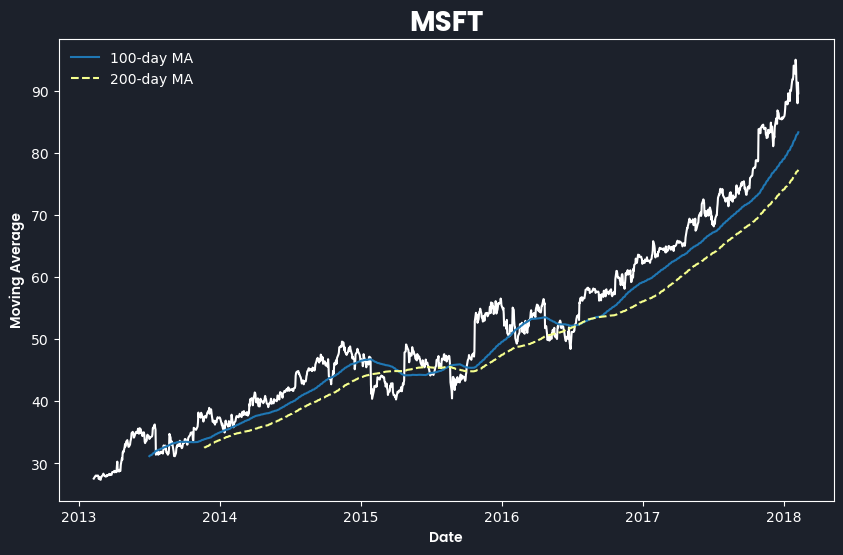

In [30]:
plt.figure(figsize=(20,12), facecolor='#1C212B')

for company in tech_list:
    filter1 = all_data['Name']==company
    df = all_data[filter1]
    plt.figure(figsize=(10,6), facecolor='#1C212B')
    plt.plot(df['date'] , df['close'], color='white')
    plt.plot(df['date'], df['close'].rolling(window=100).mean(), label='100-day MA')
    plt.plot(df['date'], df['close'].rolling(window=200).mean(), label='200-day MA', color='#F6FF8E', linestyle='--')

    # The following lines of code are for customizing the appearance of the plots.
    plt.xlabel('Date', fontweight='semibold', fontfamily='poppins', color='white')
    plt.ylabel('Moving Average', fontweight='semibold', fontfamily='poppins', color='white')
    plt.gca().set_facecolor('#1C212B')
    plt.gca().tick_params(axis='both', colors='white') 
    plt.gca().spines['bottom'].set_color('white') 
    plt.gca().spines['top'].set_color('white')
    plt.gca().spines['right'].set_color('white')
    plt.gca().spines['left'].set_color('white') 
    plt.title(company, fontdict={'fontsize': 20, 'fontname': 'poppins', 'fontweight': 'bold', 'color': 'white'})
    plt.legend(frameon=False, labelcolor='w')
    plt.show()
